A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.

The following is the story of a challenge faced by DHDL Ltd. (Name Changed), an NBFC in India. In recent times, the company is struggling to mark profits due to an increase in Loan Defaults. The company aims to determine the relative importance of each parameter with regards to their contribution as to whether a loan is going to default or not. Provided is a sample that contains the data of 90,000 + clients who have taken a loan from the company in the past with the information on whether the loan defaulted. 

The objective of this exercise is to understand which parameters play an important role in determining whether a client will default on the loan payment or not.


Goal:
The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.


In [ ]:
# %load_ext nb_black
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)


In [ ]:
# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
dic = pd.read_csv("/content/sample_data/Data_Dictionary_(1)_(1).csv")
dic

,ID,unique ID assigned to each applicant
0,loan_amnt,loan amount ($) applied each applicant
1,loan_term,Loan duration in years
2,interest_rate,Applicable interest rate on Loan in %
3,loan_grade,Loan Grade Assigned by the bank
4,loan_subgrade,Loan SubGrade Assigned by the bank
5,job_experience,Number of years job experience
6,home_ownership,Status of House Ownership
7,annual_income,Annual income of the applicant
8,income_verification_status,Status of Income verification by the bank
9,loan_purpose,Purpose of loan


In [ ]:
t_df = pd.read_csv("/content/sample_data/Train_set.csv")
ts_df = pd.read_csv("/content/sample_data/Test_set.csv")
display(t_df.sample(5), '********'*10, ts_df.sample(5))

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
43031,67841008,19800,5 years,23.99,F,F3,<5 Years,RENT,55000.0,Verified,debt_consolidation,WI,19.51,0.0,0.0,2067,22.0,968.12,INDIVIDUAL,9.0,17693.0,5000.0,1
21579,43987390,35000,3 years,12.29,C,C1,10+ years,MORTGAGE,203000.0,Verified,debt_consolidation,RI,15.66,0.0,0.0,50495,41.0,2374.04,INDIVIDUAL,31.0,494479.0,76600.0,1
46702,42444303,10750,3 years,17.14,D,D4,10+ years,RENT,37000.0,Not Verified,debt_consolidation,CA,29.35,0.0,1.0,10801,26.0,1479.49,INDIVIDUAL,48.0,37603.0,14000.0,0
61008,6787786,2500,3 years,23.63,F,F3,<5 Years,RENT,59000.0,Not Verified,other,WA,10.47,0.0,0.0,5817,15.0,985.91,INDIVIDUAL,135.0,22784.0,10600.0,0
59529,2119083,10000,3 years,14.09,B,B5,<5 Years,RENT,87000.0,Verified,debt_consolidation,CA,14.64,0.0,0.0,16720,31.0,1308.97,INDIVIDUAL,56.0,41416.0,33900.0,1


'********************************************************************************'

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
16694,59632273,15175,5 years,16.99,D,D3,10+ years,RENT,33000.0,Not Verified,debt_consolidation,AZ,28.69,0.0,0.0,35237,18.0,1036.65,INDIVIDUAL,22.0,35237.0,72300.0
10129,7189943,16000,5 years,10.16,B,B1,10+ years,RENT,73000.0,Verified,credit_card,CA,16.19,2.0,0.0,24507,21.0,3240.51,INDIVIDUAL,135.0,31018.0,75000.0
6460,1343432,25000,5 years,16.78,C,C5,10+ years,MORTGAGE,124891.0,Source Verified,debt_consolidation,CA,23.90,0.0,0.0,43039,44.0,8177.05,INDIVIDUAL,122.0,180653.0,58823.0
1086,1875891,10000,3 years,10.16,B,B1,6-10 years,MORTGAGE,48500.0,Verified,credit_card,MI,26.15,0.0,0.0,22709,23.0,1623.27,INDIVIDUAL,143.0,77000.0,29500.0
29841,13648644,21600,3 years,11.99,B,B3,<5 Years,MORTGAGE,120000.0,Source Verified,credit_card,MA,18.43,0.0,0.0,37945,52.0,1948.39,INDIVIDUAL,44.0,407871.0,61200.0


categorical column = loan_term?, loan_grade, loan_subgrade, job_experience, home_ownership,income_verification_status,loan_purpose, state_code?,application_type

In [ ]:
df_tr = t_df.copy()
df_te = ts_df.copy()

In [ ]:
# df_split = df_tr.sample(frac=0.42858522763, random_state=1)

In [ ]:
# df_split.shape

In [ ]:
# df_te = df_split

In [ ]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [ ]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

In [ ]:
df_tr.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [ ]:
df_te.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

missing values treatment,
Outlier treatment
summary
heatmap

In [ ]:
df_te.duplicated().sum()

0

In [ ]:
df_tr.nunique()

ID                            93174
loan_amnt                      1310
loan_term                         2
interest_rate                   481
loan_grade                        7
loan_subgrade                    35
job_experience                    3
home_ownership                    5
annual_income                  8667
income_verification_status        3
loan_purpose                      4
state_code                       50
debt_to_income                 3996
delinq_2yrs                      22
public_records                   15
revolving_balance             35945
total_acc                       102
interest_receive              69122
application_type                  2
last_week_pay                    90
total_current_balance         72306
total_revolving_limit          4469
default                           2
dtype: int64

In [ ]:
df_tr.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.0,3.505021e+07,2.414926e+07,70735.00,10859832.50,3.710751e+07,5.859895e+07,73519746.00
loan_amnt,93174.0,1.473386e+04,8.428185e+03,500.00,8000.00,1.300000e+04,2.000000e+04,35000.00
interest_rate,93174.0,1.323343e+01,4.368728e+00,5.32,9.99,1.299000e+01,1.620000e+01,28.99
annual_income,93173.0,7.502826e+04,6.945478e+04,1200.00,45000.00,6.400000e+04,9.000000e+04,9500000.00
debt_to_income,93174.0,1.812762e+01,8.563084e+00,0.00,11.93,1.764000e+01,2.389000e+01,672.52
delinq_2yrs,93172.0,3.169944e-01,8.808591e-01,0.00,0.00,0.000000e+00,0.000000e+00,22.00
public_records,93172.0,1.961212e-01,5.811882e-01,0.00,0.00,0.000000e+00,0.000000e+00,49.00
revolving_balance,93174.0,1.685447e+04,2.368907e+04,0.00,6433.00,1.185600e+04,2.074500e+04,2560703.00
total_acc,93172.0,2.524891e+01,1.185506e+01,1.00,17.00,2.400000e+01,3.200000e+01,119.00
interest_receive,93174.0,1.747264e+03,2.088236e+03,0.00,439.88,1.070755e+03,2.219613e+03,23172.31


- There are outliers, but they will be left in the data set because the figures are plausible.

In [ ]:
df_tr.describe(include="object").T

,count,unique,top,freq
loan_term,93174,2,3 years,65211
loan_grade,93174,7,B,26865
loan_subgrade,93174,35,B3,5879
job_experience,88472,3,<5 Years,40610
home_ownership,93174,5,MORTGAGE,46445
income_verification_status,93174,3,Source Verified,34487
loan_purpose,93174,4,debt_consolidation,55241
state_code,93174,50,CA,13744
application_type,93174,2,INDIVIDUAL,93118


In [ ]:
cat_col = [
    "loan_term",
    "loan_grade",
    "job_experience",
    "home_ownership",
    "income_verification_status",
    "loan_purpose",
    "application_type",
]

for column in cat_col:
    print(df_tr[column].value_counts())
    print("*" * 50)

3 years    65211
5 years    27963
Name: loan_term, dtype: int64
**************************************************
B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: loan_grade, dtype: int64
**************************************************
<5 Years      40610
10+ years     30362
6-10 years    17500
Name: job_experience, dtype: int64
**************************************************
MORTGAGE    46445
RENT        37449
OWN          9254
OTHER          18
NONE            8
Name: home_ownership, dtype: int64
**************************************************
Source Verified    34487
Verified           30450
Not Verified       28237
Name: income_verification_status, dtype: int64
**************************************************
debt_consolidation    55241
credit_card           21571
other                 10971
home_improvement       5391
Name: loan_purpose, dtype: int64
**************************************************
INDIVIDUAL    93118
JOINT          

In [ ]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer

In [ ]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# fit the imputer on train data and transform the train data
df_tr["job_experience"] = imp_mode.fit_transform(df_tr[["job_experience"]])
df_tr["annual_income"] = imp_mode.fit_transform(df_tr[["annual_income"]])
df_tr["delinq_2yrs"] = imp_mode.fit_transform(df_tr[["delinq_2yrs"]])
df_tr["public_records"] = imp_mode.fit_transform(df_tr[["public_records"]])
df_tr["total_acc"] = imp_mode.fit_transform(df_tr[["total_acc"]])
df_tr["last_week_pay"] = imp_mode.fit_transform(df_tr[["last_week_pay"]])
df_tr["total_current_balance"] = imp_mode.fit_transform(df_tr[["total_current_balance"]])
df_tr["total_revolving_limit"] = imp_mode.fit_transform(df_tr[["total_revolving_limit"]])
df_tr["default"] = imp_mode.fit_transform(df_tr[["default"]])

#fit the imputer on test data and transform the test data
df_te["job_experience"] = imp_mode.fit_transform(df_te[["job_experience"]])
df_te["annual_income"] = imp_mode.fit_transform(df_te[["annual_income"]])
df_te["delinq_2yrs"] = imp_mode.fit_transform(df_te[["delinq_2yrs"]])
df_te["public_records"] = imp_mode.fit_transform(df_te[["public_records"]])
df_te["total_acc"] = imp_mode.fit_transform(df_te[["total_acc"]])
df_te["last_week_pay"] = imp_mode.fit_transform(df_te[["last_week_pay"]])
df_te["total_current_balance"] = imp_mode.fit_transform(df_te[["total_current_balance"]])
df_te["total_revolving_limit"] = imp_mode.fit_transform(df_te[["total_revolving_limit"]])


In [ ]:
df_tr.isnull().sum()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

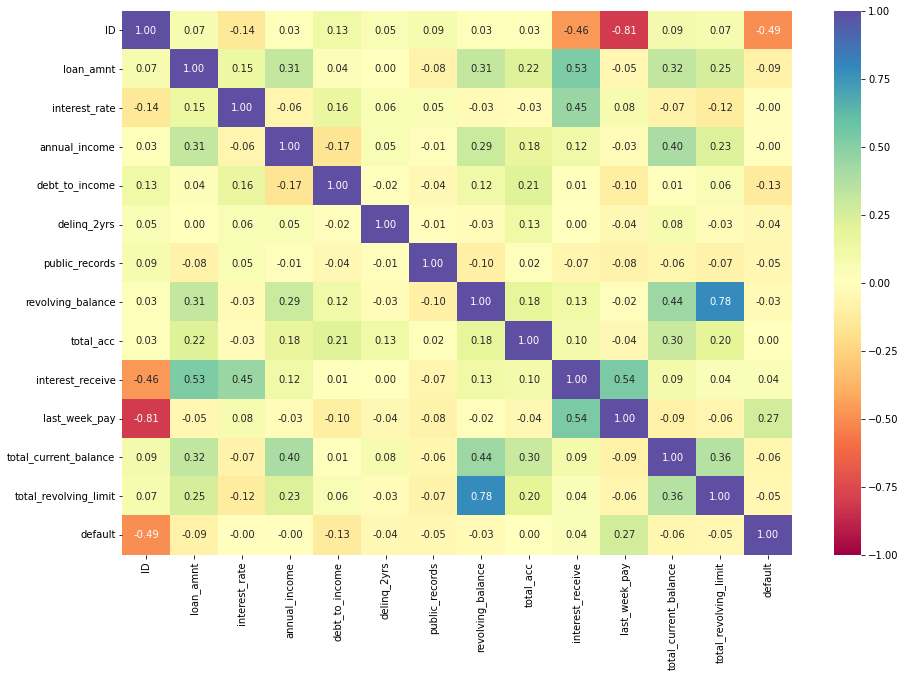

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_tr.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
# df = df_tr[df_tr.columns.difference(["ID"])]

# df2 = df_te[df_te.columns.difference(["ID"])]

In [ ]:
# df = df_tr.drop("ID", axis=1)

In [ ]:
X_train = df_tr.drop(["ID","default"], axis=1)
y_train = df_tr["default"]


In [ ]:
# df2=df_te.drop("ID",axis =1, inplace=True)

In [ ]:
X_test = df_te.drop(["ID"], axis=1)
# y_test = df_te["default"]

In [ ]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)

X_test = pd.get_dummies(data=X_test, drop_first=True)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_test = logreg.predict(X_test)

In [ ]:
print(X_train.shape, X_test.shape)

(93174, 114) (39933, 114)


In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic", LogisticRegression(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Testing Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_test, model.predict(X_test))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 46.67175422069384
Random forest: 31.022639206946113
GBM: 30.35384438640698
Adaboost: 30.20018126070651
Xgboost: nan
dtree: 56.70384196108766
Logistic: 18.60923919009653

Testing Performance:

Bagging: 0.4828897338403042
Random forest: 0.4816223067173637
GBM: 0.44106463878326996
Adaboost: 0.4389522602450359


ValueError: ignored

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
ranfo = RandomForestClassifier(random_state=1)
# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(5, 25, 5)) + [None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": np.arange(5, 11, 1),
    "min_samples_split": np.arange(2, 20, 5),
    "n_estimators": np.arange(10, 60, 5),
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
# Calling RandomizedSearchCV
ranfo_tuned = RandomizedSearchCV(
    estimator=ranfo,
    param_distributions=parameters,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
)

# Fitting parameters in RandomizedSearchCV
ranfo_tuned.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        ranfo_tuned.best_params_, ranfo_tuned.best_score_
    )
)

In [ ]:
ranfo_tuned = RandomForestClassifier(
    n_estimators=55,
    min_samples_split=12,
    min_samples_leaf=6,
    max_features=None,
    max_depth=None,
    random_state=1,
)

ranfo_tuned.fit(X_train, y_train)

In [ ]:
ranfo_random_train = model_performance_classification_sklearn(
    ranfo_tuned, X_train, y_train
)

print("Performance on Training")
ranfo_random_train

In [ ]:
ranfo_random_val = model_performance_classification_sklearn(ranfo_tuned, X_test, y_test)

print("Performance on Testing")
ranfo_random_val

In [ ]:
# defining model
model = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
gbm_tuned = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
)

# Fitting parameters in RandomizedSearchCV
gbm_tuned.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        gbm_tuned.best_params_, gbm_tuned.best_score_
    )
)

Best parameters are {'subsample': 1, 'n_estimators': 250, 'max_features': 0.9} with CV score=0.3977585147855124:


In [ ]:
gbm_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    subsample=0.8,
    n_estimators=250,
    max_features=0.9,
)

gbm_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

In [ ]:
gbm_random_train = model_performance_classification_sklearn(gbm_tuned, X_train, y_train)

print("Performance on Training")
gbm_random_train

Performance on Training


,Accuracy,Recall,Precision,F1
0,0.841254,0.399657,0.854493,0.544598


In [ ]:
gbm_random_test = model_performance_classification_sklearn(gbm_tuned, X_test, y_test)

print("Performance on Testing")
gbm_random_test

Performance on Testing


,Accuracy,Recall,Precision,F1
0,0.92267,0.438952,0.371204,0.402245


## Next...explore early stopping